<p></p><p><b>Step 1</b></p>
Import libraries

In [1]:
from os import write
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

<p></p><p><b>Step 2</b></p>
Read csv files

In [2]:
data_spotify_all = read_csv("AllSpotifySongs.csv")
data_spotify_liked = read_csv("RandomSpotifyList_Liked.csv")

<p></p><p><b>Step 3</b></p>
Set data frames

In [3]:
data_spotify_all = pd.DataFrame(data_spotify_all)

tracks_df = data_spotify_liked
bad_tracks_df = data_spotify_all

<p></p><p><b>Step 4</b></p>
Prepare data for learning

In [4]:
# mark liked songs with 1
tracks_df['liked'] = 1
 
# mark unliked songs wih 0
bad_tracks_df['liked'] = 0
 
# We create equal collections of likes and dislikes songs. 
# The larger the set of dislikes, the algorithm will return more songs
disliked_df = bad_tracks_df.sample(n=tracks_df.shape[0]*1)

#set
all_tracks_full = tracks_df.append(disliked_df).drop_duplicates()
 
# sort data randomly
all_tracks_full = all_tracks_full.sample(frac=1).reset_index(drop=True)

#get columns with values only
all_tracks = all_tracks_full[[
       'id',
       'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 
    #    'time_signature', 
       'liked']]

<p></p><p><b>Step 5</b></p>
Set test and train data, set model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(all_tracks.drop('liked', axis=1),
                                                    all_tracks['liked'],
                                                    test_size=0.6)

model = RandomForestClassifier()
model.fit(X_train.drop('id', axis=1), y_train)

RandomForestClassifier()

<p></p><p><b>Step 6</b></p>
Calculate prediction on test dataset and print the outcome

In [6]:
y_pred = model.predict(X_test.drop('id', axis=1))
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       113
           1       0.70      0.46      0.55        50

    accuracy                           0.77       163
   macro avg       0.74      0.69      0.70       163
weighted avg       0.76      0.77      0.76       163



<p></p><p><b>Step 7</b></p>
Filter out songs proposals

In [7]:
X_test['predicted_like'] = y_pred
 
new_tracks = X_test[X_test['predicted_like'] == 1][['popularity']]
 
#add info on artist and song
new_tracks = new_tracks.merge(all_tracks_full, how='inner', on='popularity')
 
#erease liked songs so only proposed for liking remains
new_tracks = new_tracks[new_tracks['liked'] == 0]

In [8]:
#leave only necessary columns
new_tracks = new_tracks[[
       'id', 'name', 'artist',
       'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 
       'time_signature', 
       'liked']]
 
#outcome
print(new_tracks.drop_duplicates())


                         id  \
0    69xUkf647IyVn8cJtQ4zRk   
1    2mVemNBp0y8E1lLOczCUMh   
2    2W6o5dI0sfWRafsusPWZHJ   
3    2Up5Gs5EJeAPeR3Ce5Aspi   
8    3APayTEWiUl9Ssep4BOXR2   
17   68n6dP1mFriPt4TRul6WhE   
19   3Sm5TYFgMXyXwgAcY2xweX   
28   0k2GOhqsrxDTAbFFSdNJjT   
31   1JLn8RhQzHz3qDqsChcmBl   
39   4LFwNJWoj74Yd71fIr1W8x   
68   6fqLce5TNAmNgbFwXD2DdG   
69   6BQNJ0JFKh8sWjQLI6Zudi   
70   3VZmChrnVW8JK6ano4gSED   
73   5awDvzxWfd53SSrsRZ8pXO   
76   0q6LuUqGLUiCPP1cbdwFs3   
77   3X7uFMzJrEE0sxn62qd8Ch   
84   4X1LS2LEYxKdlvHq5oZesi   
86   0gOyllwzM7IvfuYZ903zNv   
87   1ATf7Kadvu2629G2bNSP3K   
89   5mpljnlp36HDNEeSszaVha   
90   5QqdvVeYLL1xvZ1ndUjxnO   
91   111BQRr9rRMHTn69KamC4Z   
92   243NB0yDHxtapXQvJvCaW6   
93   0JhKJg5ejeQ8jq89UQtnw8   
94   2UBYNTJKvk9feVfW9f2ACK   
96   6iBnzic7nLl98CKPdM5ZII   
97   0GvAi1lFRDLXkPr9Y7WFkD   
98   0sDqo9UPzPUtu9wEkI3zRB   
99   6hKi7fbGQu9gqfgc6TTeX9   
100  5hHMqM6Os64hKiCNr3cyko   
102  3Q8PSzpMJknr3rzuVwDYrR   
103  5o0

<p></p><p><b>Step 8</b></p>
Create file with proposed playlist (list of songs)

<Figure size 1080x1080 with 0 Axes>

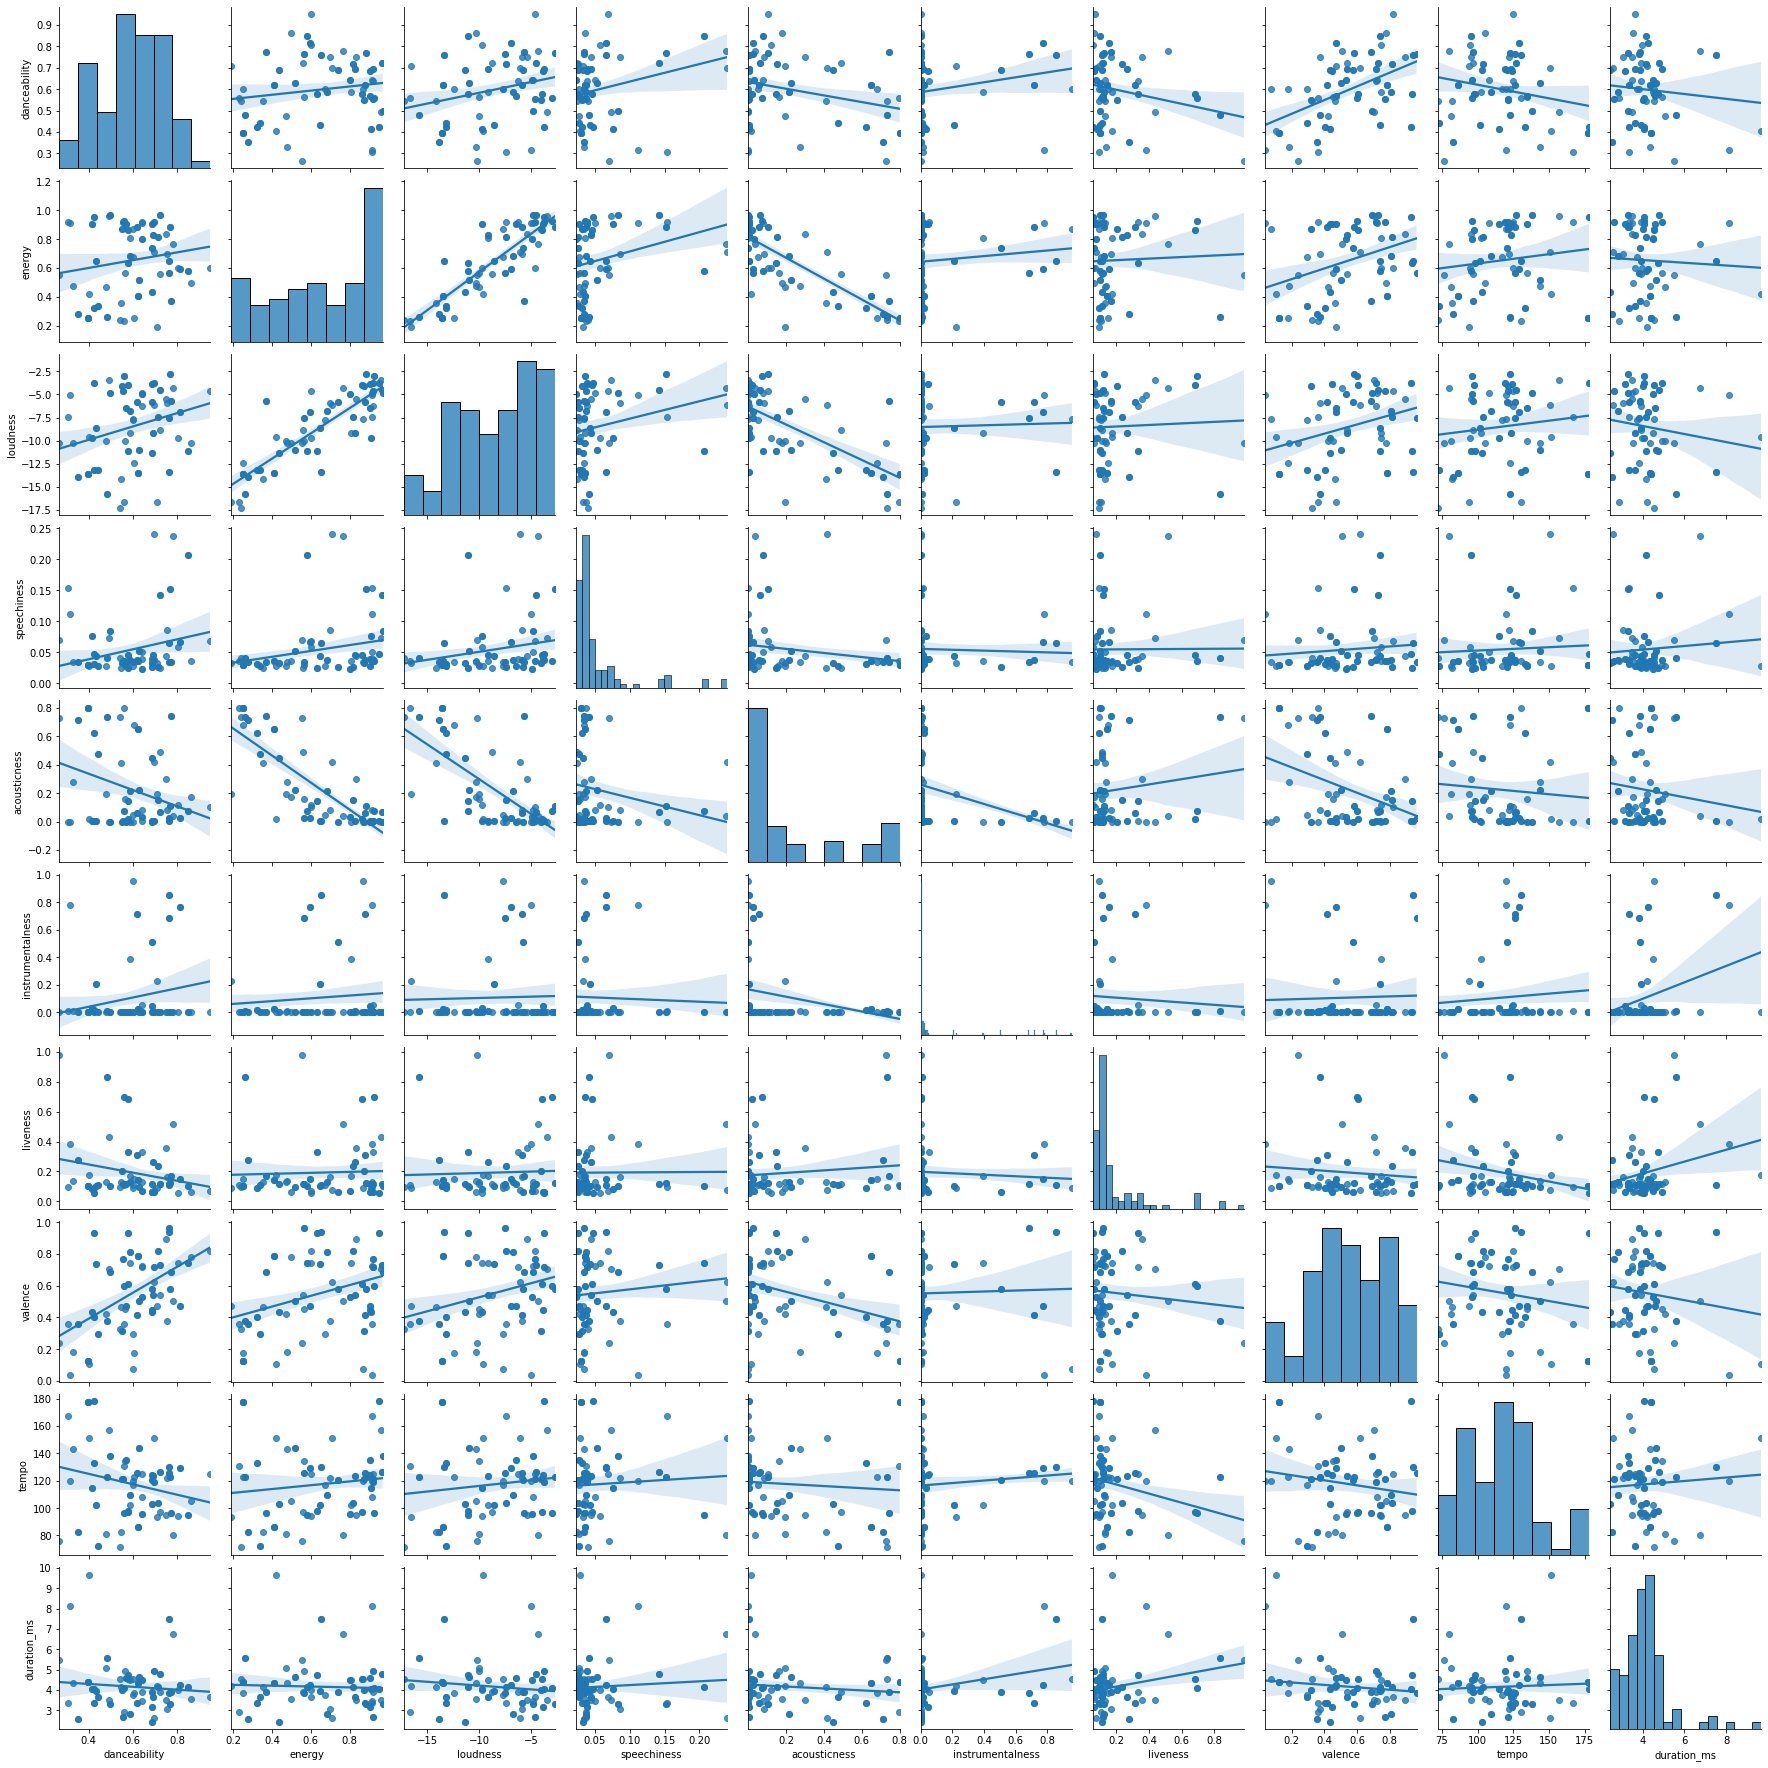

In [9]:
# saving predicted music list

new_tracks.drop_duplicates().to_csv("NewList.csv")

# showing result of prediction 
fig = plt.figure(figsize=(15,15))
sns.pairplot(new_tracks[['danceability', 'energy','loudness',
                        'speechiness', 'acousticness',
                        'instrumentalness', 'liveness', 'valence',
                        'tempo', 'duration_ms'
                        ]],
             kind="reg")
 
plt.show()
